In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/Clusterizacao-dados-sem-rotulo/main/Dados/dados_mkt.csv'

# Coletando e ajustando dados

In [3]:
df = pd.read_csv(url)
df

,sexo,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,...,musica,rock,cabelo,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas
0,F,27,49,0,0,10,0,0,10,0,...,0,0,0,0,0,0,0,0,0,10
1,F,27,41,0,0,0,0,0,0,0,...,10,20,40,0,10,0,0,0,0,10
2,F,26,1,0,0,0,0,0,10,0,...,10,0,50,0,0,0,30,0,0,0
3,M,28,32,0,50,0,0,0,0,0,...,10,10,0,0,0,0,0,0,0,0
4,M,28,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,F,26,21,0,0,0,0,0,0,0,...,0,10,10,0,0,0,20,0,0,0
12988,F,26,50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12989,F,27,32,0,0,0,0,0,0,10,...,0,0,0,0,0,0,0,0,0,0
12990,F,27,20,0,0,0,0,0,0,0,...,10,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12992 entries, 0 to 12991
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sexo               12992 non-null  object
 1   idade              12992 non-null  int64 
 2   numero_de_amigos   12992 non-null  int64 
 3   basquete           12992 non-null  int64 
 4   futebol_americano  12992 non-null  int64 
 5   futebol            12992 non-null  int64 
 6   softbol            12992 non-null  int64 
 7   voleibol           12992 non-null  int64 
 8   natacao            12992 non-null  int64 
 9   animacao           12992 non-null  int64 
 10  beisebol           12992 non-null  int64 
 11  tenis              12992 non-null  int64 
 12  esportes           12992 non-null  int64 
 13  fofo               12992 non-null  int64 
 14  danca              12992 non-null  int64 
 15  banda              12992 non-null  int64 
 16  marcha             12992 non-null  int64

In [5]:
df['sexo'].unique()

array(['F', 'M', 'NE'], dtype=object)

## Aplicando encoder

In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories=[['F', 'M', 'NE']], sparse_output=False)

In [7]:
encoded_sexo = encoder.fit_transform(df[['sexo']])
encoded_sexo

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [8]:
encoded_df = pd.DataFrame(encoded_sexo,columns=encoder.get_feature_names_out(['sexo']))

In [9]:
dados = pd.concat([df, encoded_df], axis=1).drop('sexo', axis=1)
dados

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,...,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
0,27,49,0,0,10,0,0,10,0,0,...,0,0,0,0,0,0,10,1.0,0.0,0.0
1,27,41,0,0,0,0,0,0,0,10,...,0,10,0,0,0,0,10,1.0,0.0,0.0
2,26,1,0,0,0,0,0,10,0,0,...,0,0,0,30,0,0,0,1.0,0.0,0.0
3,28,32,0,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
4,28,18,0,0,0,0,0,0,0,0,...,0,0,0,10,0,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,26,21,0,0,0,0,0,0,0,0,...,0,0,0,20,0,0,0,1.0,0.0,0.0
12988,26,50,0,0,0,0,0,0,0,10,...,0,0,0,0,0,0,0,1.0,0.0,0.0
12989,27,32,0,0,0,0,0,0,10,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
12990,27,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0


In [10]:
import joblib

joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

## Desenvolvendo o modelo

In [11]:
from sklearn.cluster import KMeans

mod_kmeans = KMeans(n_clusters=2, random_state=45)

In [12]:
modelo = mod_kmeans.fit(dados)

# Avaliando o K-means

In [13]:
mod_kmeans.inertia_

24912957.59458855

In [14]:
from sklearn.metrics import silhouette_score

silhouette_score(dados, mod_kmeans.predict(dados))

0.3799715886302017

## Avaliando métricas para diferentes K

In [15]:
def avaliacao(dados):
    inercia = []
    silhueta = []

    for k in range(2, 21):
        kmeans = KMeans(n_clusters=k, random_state=45, n_init='auto')
        kmeans.fit(dados)
        inercia.append(kmeans.inertia_)
        silhueta.append(f'k={k} - ' + str(silhouette_score(dados, kmeans.predict(dados))))
    
    return silhueta, inercia


In [16]:
silhueta, inercia = avaliacao(dados)
silhueta

['k=2 - 0.3799715886302017',
 'k=3 - 0.2631947012216279',
 'k=4 - 0.27497370057197046',
 'k=5 - 0.2762790287828939',
 'k=6 - 0.2814107923103627',
 'k=7 - 0.19566339131554092',
 'k=8 - 0.12271514125212872',
 'k=9 - 0.1281093701405103',
 'k=10 - 0.13020718009107704',
 'k=11 - 0.13209306347804026',
 'k=12 - 0.09015815350273831',
 'k=13 - 0.09002551845716941',
 'k=14 - 0.08959066111262458',
 'k=15 - 0.09427696863257996',
 'k=16 - 0.09552364235312874',
 'k=17 - 0.09543714624178481',
 'k=18 - 0.08844412672288283',
 'k=19 - 0.0844173588143633',
 'k=20 - 0.08484109789709748']

## Aula 2.3 - Verificando a silhueta por amostras

In [17]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def graf_silhueta (n_clusters, dados):

  # Aplica o KMeans ao conjunto de dados
  kmeans = KMeans(n_clusters=n_clusters, random_state=45, n_init = 'auto')
  cluster_previsoes = kmeans.fit_predict(dados)

  # Calcula o silhouette score médio
  silhueta_media = silhouette_score(dados, cluster_previsoes)
  print(f'Valor médio para {n_clusters} clusters: {silhueta_media:.3f}')

  # Calcula a pontuação de silhueta para cada amostra
  silhueta_amostra = silhouette_samples(dados, cluster_previsoes)

  # Configuração da figura para o gráfico de silhueta
  fig, ax1 = plt.subplots(1, 1)
  fig.set_size_inches(9, 7)

  # Limites do gráfico de silhueta
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(dados) + (n_clusters + 1) * 10])

  y_lower = 10
  for i in range(n_clusters):
      ith_cluster_silhueta_amostra = silhueta_amostra[cluster_previsoes == i]
      ith_cluster_silhueta_amostra.sort()

      tamanho_cluster_i = ith_cluster_silhueta_amostra.shape[0]
      y_upper = y_lower + tamanho_cluster_i

      cor = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhueta_amostra,
                        facecolor=cor, edgecolor=cor, alpha=0.7)

      ax1.text(-0.05, y_lower + 0.5 * tamanho_cluster_i, str(i))
      y_lower = y_upper + 10  # 10 para o espaço entre gráficos

  # Linha vertical para a média do Silhouette Score
  ax1.axvline(x=silhueta_media, color='red', linestyle='--')

  ax1.set_title(f'Gráfico da Silhueta para {n_clusters} clusters')
  ax1.set_xlabel('Valores do coeficiente de silhueta')
  ax1.set_ylabel('Rótulo do cluster')

  ax1.set_yticks([])  # Remove os ticks do eixo y
  ax1.set_xticks([i/10.0 for i in range(-1, 11)])

  plt.show()

Valor médio para 2 clusters: 0.380


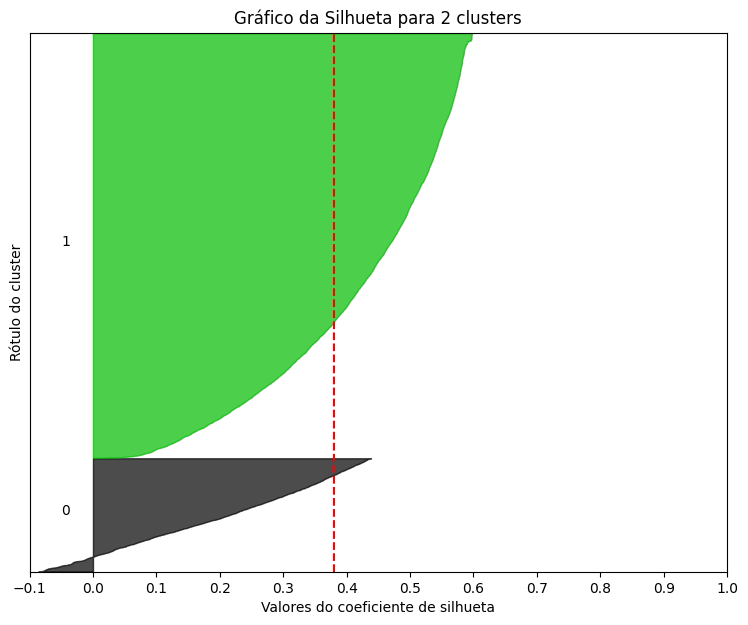

In [18]:
graf_silhueta(2, dados)

### Outras visualizações

In [19]:
def plot_cotovelo(inercia):
    plt.figure(figsize=(8,4))
    plt.plot(range(2,21), inercia, 'bo-')
    plt.xlabel('Número de Cluster')
    plt.ylabel('Inércia')
    plt.title('Método do Cotovelo para Determinação de k')
    plt.show()

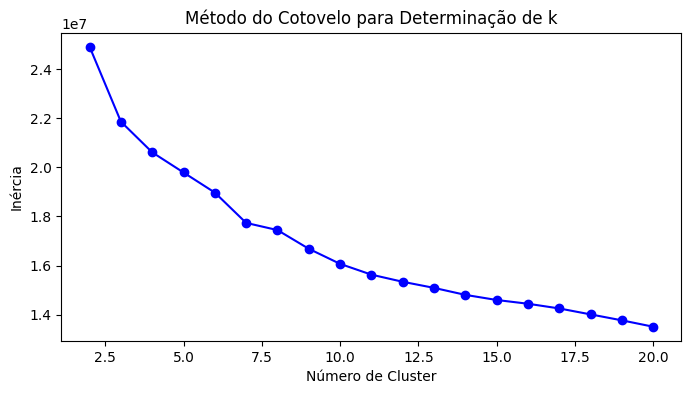

In [20]:
plot_cotovelo(inercia)

# Avaliação e ajuste de dados

## Verificando as métricas para os novos dados

## Criando o melhor modelo

# Analisando as informações de cada cluster

## Descrevendo cada agrupamento